# Exploring the Data Set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

C:\Users\Thomas\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
raw_data = pd.read_csv('./data/sales_invoiced_lines_basics.csv', sep=',')
raw_data.head()

,Id,DimEntityId,DimOrderTypeId,OrderTypeCode,DimGeographyId,Country,Date,DimGenderId,DimBillToCustomerId,CustomerMainType,...,RRSalesPriceDKK,DimOrderSalespersonId,DimOrderCountryManagerId,OrderHeaderNumber,OrderLineNumber,Inbound Duty,Quantity,Amount,Discount,Cost
0,459456,43,220,B2BSUP,71,Finland,2022-03-12,2,1715,WHOLESALE,...,450.0,112,2,103099,10002,0.12,2.0,351.18,21.06,151.96
1,460938,43,220,B2BSUP,57,Germany,2022-03-12,2,1228,WHOLESALE,...,600.0,84,6,103113,50000,0.12,2.0,427.07,0.00,176.62
2,459441,43,220,B2BSUP,59,Denmark,2022-03-12,1,2519,WHOLESALE,...,450.0,184,2,103083,30000,0.00,2.0,280.00,0.00,126.22
3,460101,43,220,B2BSUP,167,Netherlands,2022-03-12,2,1532,WHOLESALE,...,800.0,108,3,103142,50003,0.12,1.0,316.21,0.00,160.48
4,459451,43,220,B2BSUP,59,Denmark,2022-03-12,1,2519,WHOLESALE,...,450.0,184,2,103083,30001,0.00,2.0,280.00,0.00,126.22


In [3]:
print(raw_data.columns)

Index(['Id', 'DimEntityId', 'DimOrderTypeId', 'OrderTypeCode',
       'DimGeographyId', 'Country', 'Date', 'DimGenderId',
       'DimBillToCustomerId', 'CustomerMainType', 'CustomerSubGroup',
       'DimCollectionId', 'DimItemId', 'ItemNo2', 'StyleID', 'Style', 'Color',
       'Size', 'EAN', 'Gender', 'Category', 'SUB Category', 'SUB Category2',
       'Quality', 'Origin Country', 'WHSSalesPriceDKK', 'RRSalesPriceDKK',
       'DimOrderSalespersonId', 'DimOrderCountryManagerId',
       'OrderHeaderNumber', 'OrderLineNumber', 'Inbound Duty', 'Quantity',
       'Amount', 'Discount', 'Cost'],
      dtype='object')


In [ ]:
print('Shape of raw data: ' + str(raw_data.shape))
raw_data.describe()

Shape of raw data: (831459, 37)


,Unnamed: 0,Id,DimEntityId,DimOrderTypeId,DimGeographyId,DimPostingDateId,DimGenderId,DimBillToCustomerId,DimCollectionId,DimItemId,...,WHSSalesPriceDKK,RRSalesPriceDKK,DimOrderSalespersonId,DimOrderCountryManagerId,OrderLineNumber,Inbound Duty,Quantity,Amount,Discount,Cost
count,831459.000000,8.314590e+05,831459.0,831459.000000,831459.000000,8.314590e+05,831459.000000,831459.000000,831459.0,831459.000000,...,831459.000000,831459.000000,831459.000000,831459.000000,8.314590e+05,819683.000000,831459.000000,831459.000000,831459.000000,831459.000000
mean,415729.000000,1.839673e+06,43.0,225.883062,114.404270,2.023161e+07,1.508779,1828.504951,53.0,228983.895318,...,235.302855,604.832553,173.336640,2.180332,1.516198e+05,0.048116,1.886205,443.672980,56.477795,179.630284
std,240021.683073,1.105828e+06,0.0,24.850971,61.918222,7.670096e+03,0.500584,836.800294,0.0,201559.442276,...,145.361565,363.796695,102.511581,1.742974,3.376214e+05,0.058497,4.540327,826.167223,281.543195,345.168172
min,0.000000,2.000000e+00,43.0,-1.000000,-1.000000,2.022031e+07,1.000000,970.000000,53.0,20017.000000,...,0.000000,0.000000,-1.000000,-1.000000,1.000000e+00,0.000000,-1.000000,-477.380000,-477.380000,-453.360000
25%,207864.500000,7.731185e+05,43.0,220.000000,59.000000,2.022122e+07,1.000000,1094.000000,53.0,23383.000000,...,110.000000,300.000000,91.000000,2.000000,3.000000e+04,0.000000,1.000000,176.080000,0.000000,61.830000
50%,415729.000000,1.930284e+06,43.0,220.000000,76.000000,2.023083e+07,2.000000,1523.000000,53.0,262142.000000,...,195.000000,500.000000,197.000000,2.000000,6.000200e+04,0.000000,1.000000,308.600000,14.320000,123.840000
75%,623593.500000,2.884288e+06,43.0,244.000000,168.000000,2.024040e+07,2.000000,2358.000000,53.0,430423.000000,...,320.000000,800.000000,271.000000,3.000000,1.500020e+05,0.120000,2.000000,500.000000,38.500000,189.440000
max,831458.000000,3.529990e+06,43.0,244.000000,234.000000,2.024111e+07,4.000000,3931.000000,53.0,690362.000000,...,1480.000000,3700.000000,284.000000,7.000000,1.281000e+07,0.120000,1500.000000,215758.560000,52976.000000,75360.000000


##Data processing##

In [ ]:
big_df = raw_data.set_index('Id')
big_df.drop(['Unnamed: 0'], axis=1, inplace=True)
big_df["DimPostingDateId"] = pd.to_datetime(big_df["DimPostingDateId"], format='%Y%m%d')
big_df.rename(columns={'DimPostingDateId': 'Date'}, inplace=True)

In [ ]:
# Dropping missing values
print("Shape of big_df before dropping NaNs: " + str(big_df.shape))
print("Deleted rows: " + str(big_df.isnull().sum().sum()))
big_df.dropna(inplace=True)
print("Shape of big_df after dropping NaNs: " + str(big_df.shape))


Shape of big_df before dropping NaNs: (831459, 35)
Deleted rows: 21545
Shape of big_df after dropping NaNs: (810202, 35)


Data Exploration

In [ ]:
unique_categories = big_df['Category'].unique()
print("Unique categories: " + str(unique_categories))

Unique categories: ['Tops' 'Shirts' 'Trousers' 'Jeans' 'Knitwear' 'Dresses' 'Underwear'
 'Outerwear' 'Socks' 'Skirts' 'Sweats' 'Blazers' 'Shoes' 'Hats' 'Bags'
 'Shorts']


In [ ]:
for category in unique_categories:
    print(category + " has the following subcategories")
    print(big_df[big_df['Category'] == category]['SUB Category'].unique(), end = '\n\n')

Tops has the following subcategories
['V-neck' 'Crew neck' 'Tank' 'Turtleneck' 'Crew Neck' 'Polo']

Shirts has the following subcategories
['Shirts' 'Overshirt']

Trousers has the following subcategories
['Trousers']

Jeans has the following subcategories
['Jeans']

Knitwear has the following subcategories
['Cardigan' 'Crew neck' 'V-neck' 'Turtleneck' 'Polo' 'Hoodie']

Dresses has the following subcategories
['Mini' 'Midi' 'Maxi']

Underwear has the following subcategories
['Panties' 'Bra']

Outerwear has the following subcategories
['Jacket' 'Raincoat']

Socks has the following subcategories
['Socks']

Skirts has the following subcategories
['Midi' 'Maxi']

Sweats has the following subcategories
['Crew neck' 'Hoodie']

Blazers has the following subcategories
['Blazers']

Shoes has the following subcategories
['Sneakers' 'Flats']

Hats has the following subcategories
['Beanie' 'Cap']

Bags has the following subcategories
['Tote']

Shorts has the following subcategories
['Shorts']



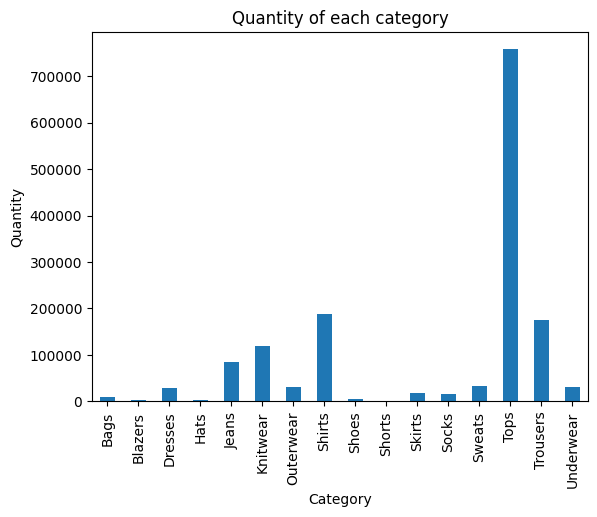

In [ ]:
# Bar plot of each catagory and its quantity
category_quantity = big_df.groupby('Category')['Quantity'].sum()
category_quantity.plot(kind='bar')
plt.ylabel('Quantity')
plt.title('Quantity of each category')
plt.show()

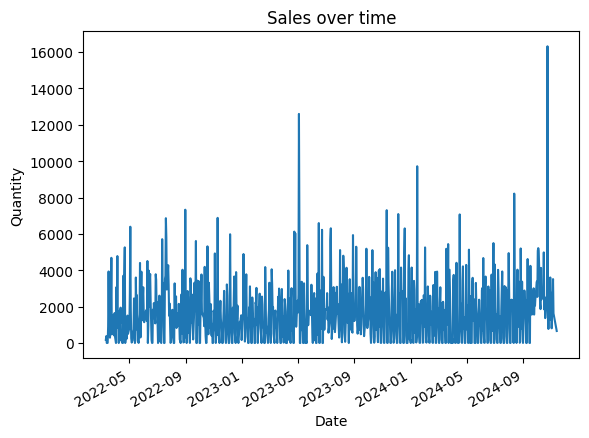

In [ ]:
sales_over_time = big_df.groupby('Date')['Quantity'].sum()
sales_over_time.plot()
plt.ylabel('Quantity')
plt.title('Sales over time')
plt.show()

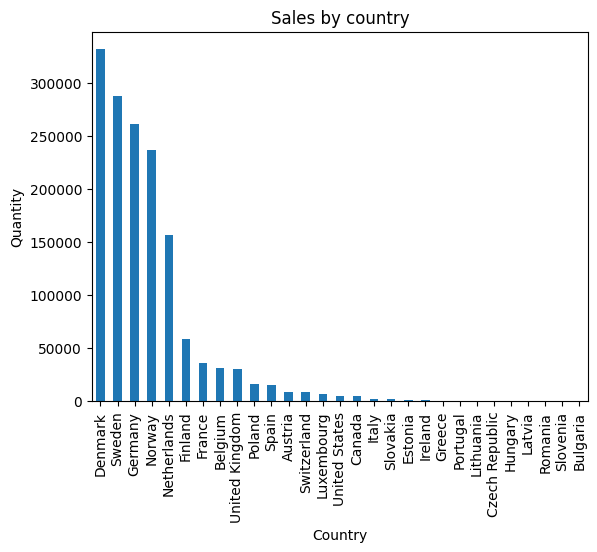

In [ ]:
sales_by_country = big_df.groupby('Country')['Quantity'].sum()
saled_by_country_sorted = sales_by_country.sort_values(ascending=False)
saled_by_country_sorted.plot(kind='bar')
plt.ylabel('Quantity')
plt.title('Sales by country')
plt.show()

C:\Users\Thomas\AppData\Local\Temp\ipykernel_1428\1472441194.py:9: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  for date in pd.date_range(start=biggest_sale_by_date.index.min(), end=biggest_sale_by_date.index.max(), freq='Q'):


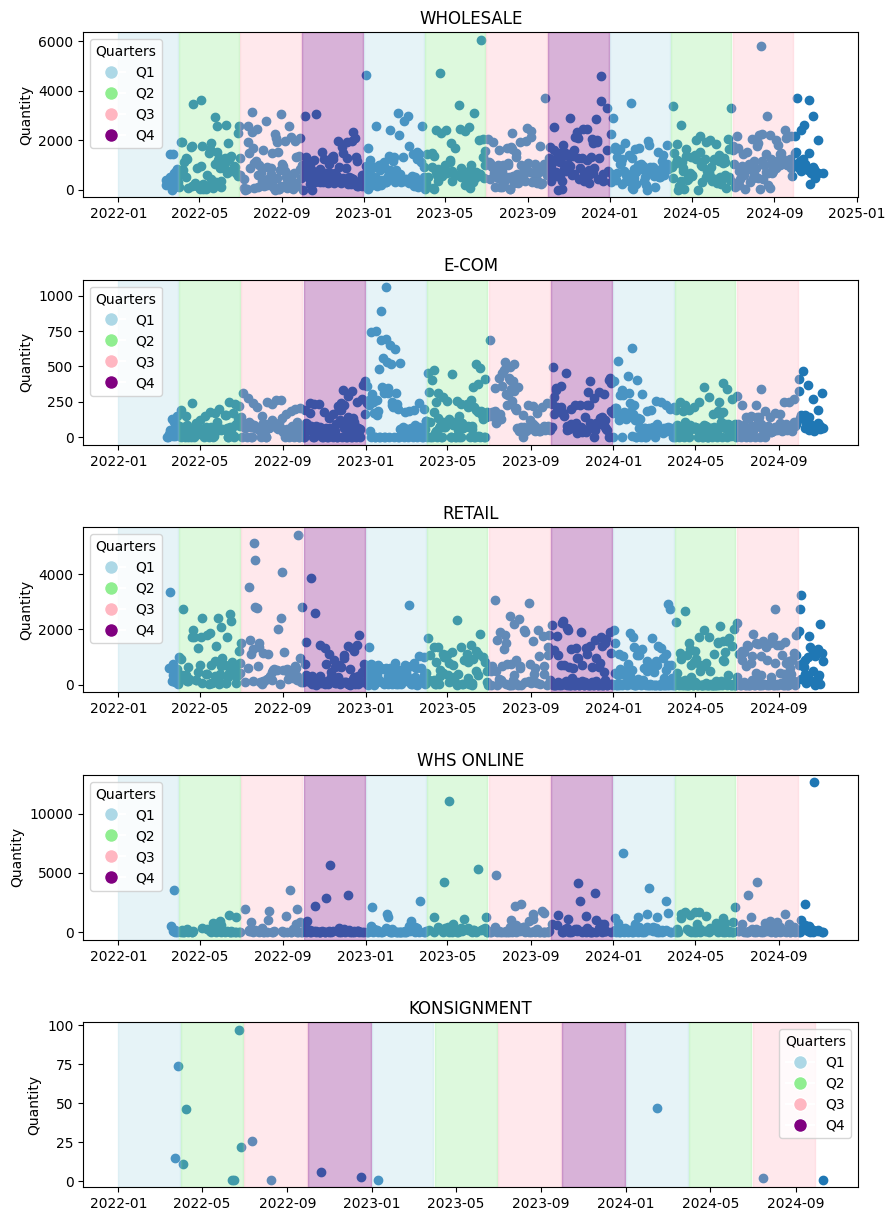

In [ ]:
customer_types = big_df['CustomerMainType'].unique()
fig, axes = plt.subplots(customer_types.shape[0], 1, figsize=(10, 15))  # Increased figure height for more space
for customer_type in customer_types:
    biggest_sale_by_date = big_df[big_df["CustomerMainType"] == customer_type].groupby('Date')['Quantity'].sum().sort_values(ascending=False)
    ax = axes[customer_types.tolist().index(customer_type)]
    ax.scatter(biggest_sale_by_date.index, biggest_sale_by_date)
    ax.set_ylabel('Quantity')
    ax.set_title(customer_type)
    for date in pd.date_range(start=biggest_sale_by_date.index.min(), end=biggest_sale_by_date.index.max(), freq='Q'):
        quarter_start = date - pd.offsets.QuarterBegin(startingMonth=1)
        quarter_end = date - pd.offsets.Day(1)
        
        if date.month in [1, 2, 3]:  # Q1
            quarter_color = 'lightblue'
        elif date.month in [4, 5, 6]:  # Q2
            quarter_color = 'lightgreen'
        elif date.month in [7, 8, 9]:  # Q3
            quarter_color = 'lightpink'
        elif date.month in [10, 11, 12]:  # Q4
            quarter_color = 'purple'

        ax.axvspan(quarter_start, quarter_end, color=quarter_color, alpha=0.3)
    patch1 = plt.Line2D([0], [0], marker='o', color='w', label='Q1', markerfacecolor='lightblue', markersize=10)
    patch2 = plt.Line2D([0], [0], marker='o', color='w', label='Q2', markerfacecolor='lightgreen', markersize=10)
    patch3 = plt.Line2D([0], [0], marker='o', color='w', label='Q3', markerfacecolor='lightpink', markersize=10)
    patch4 = plt.Line2D([0], [0], marker='o', color='w', label='Q4', markerfacecolor='purple', markersize=10)
    ax.legend(handles=[patch1, patch2, patch3, patch4], title='Quarters')
        


plt.subplots_adjust(hspace=0.5) 
plt.show()


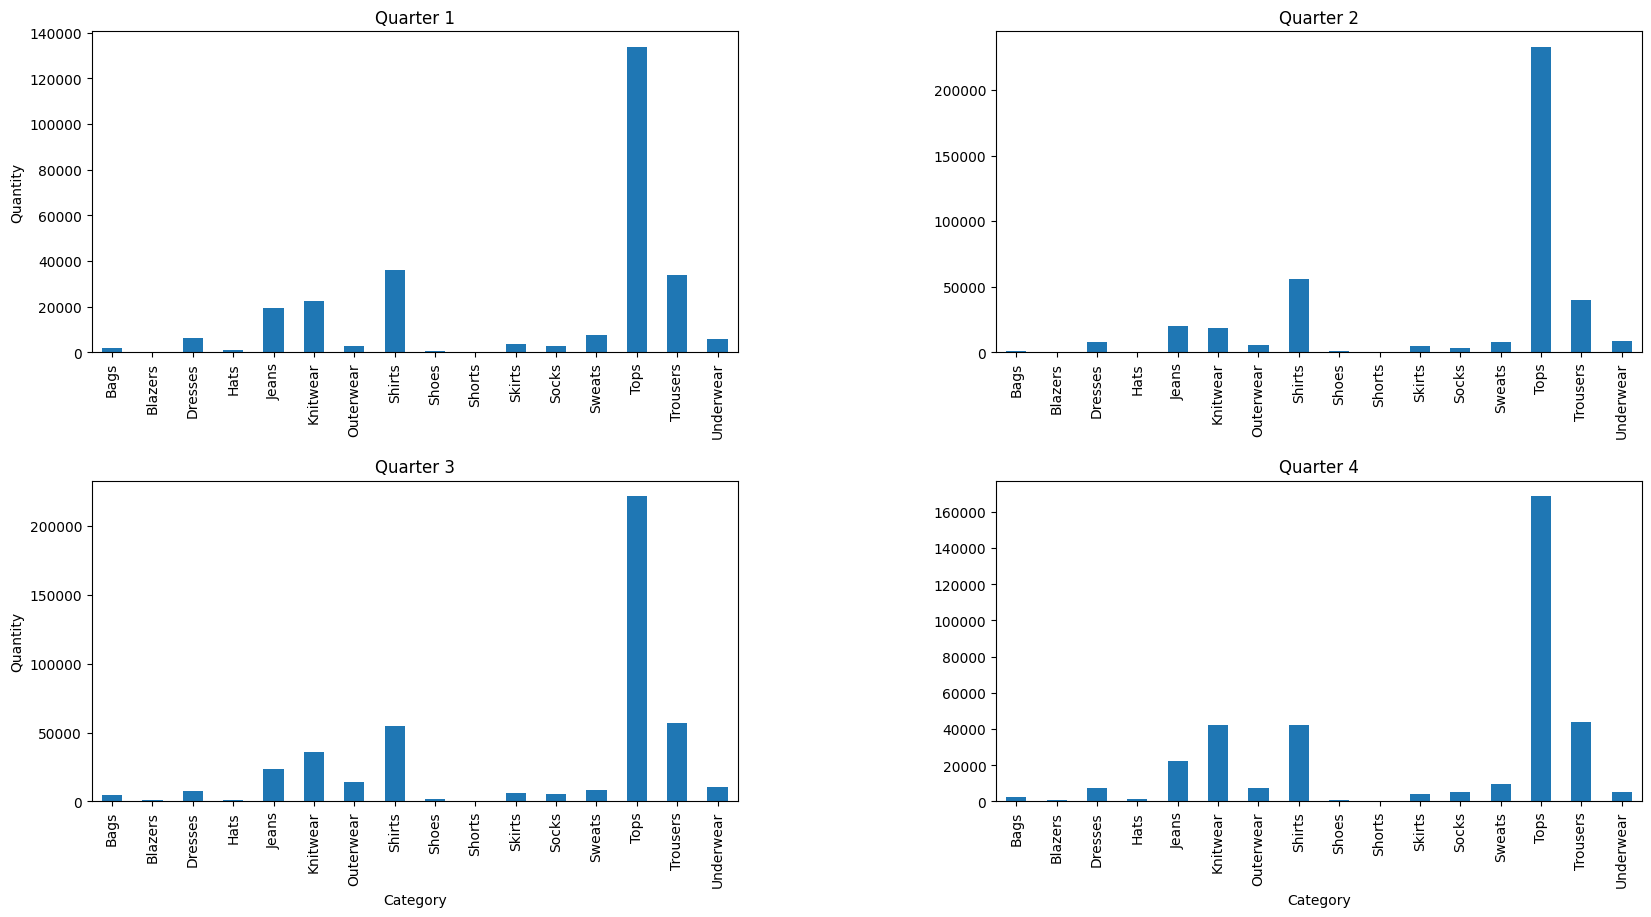

In [ ]:
# Exploring seasonality
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
big_df['Quarter'] = big_df['Date'].dt.quarter
unique_quarters = big_df['Quarter'].unique()
for i, quarter in enumerate(unique_quarters):
    ax = axes[i//2, i%2]
    big_df[big_df['Quarter'] == quarter].groupby('Category')['Quantity'].sum().plot(kind="bar", ax=ax)
    ax.set_title('Quarter ' + str(quarter))
    if i == 0 or i == 2:
        ax.set_ylabel('Quantity')
    if i == 0 or i == 1:
        ax.set_xlabel('')

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

In [ ]:
unique_quarters = big_df['Quarter'].unique()
list_of_quarters = []
for quarter in unique_quarters:
    list_of_quarters.append(big_df[big_df['Quarter'] == quarter].groupby('Category')['Quantity'].sum())

category_quarterly_procents= []
for category in unique_categories:
    category_procents = []
    for i,quarter_list in enumerate(list_of_quarters):
        quarter_sum = quarter_list.sum()
        category_sum = quarter_list[category]
        category_procents.append(("Quarter " + str(i) , round(category_sum / quarter_sum * 100, 2)))
    category_quarterly_procents.append((category, category_procents))
    print(category + " has the following procents: " + str(category_procents))

Tops has the following procents: [('Quarter 0', 48.13), ('Quarter 1', 56.93), ('Quarter 2', 48.84), ('Quarter 3', 46.41)]
Shirts has the following procents: [('Quarter 0', 12.94), ('Quarter 1', 13.69), ('Quarter 2', 12.13), ('Quarter 3', 11.55)]
Trousers has the following procents: [('Quarter 0', 12.15), ('Quarter 1', 9.74), ('Quarter 2', 12.56), ('Quarter 3', 12.02)]
Jeans has the following procents: [('Quarter 0', 6.98), ('Quarter 1', 4.83), ('Quarter 2', 5.19), ('Quarter 3', 6.16)]
Knitwear has the following procents: [('Quarter 0', 8.14), ('Quarter 1', 4.56), ('Quarter 2', 7.91), ('Quarter 3', 11.57)]
Dresses has the following procents: [('Quarter 0', 2.24), ('Quarter 1', 1.88), ('Quarter 2', 1.62), ('Quarter 3', 2.09)]
Underwear has the following procents: [('Quarter 0', 2.17), ('Quarter 1', 2.2), ('Quarter 2', 2.24), ('Quarter 3', 1.39)]
Outerwear has the following procents: [('Quarter 0', 1.03), ('Quarter 1', 1.42), ('Quarter 2', 3.17), ('Quarter 3', 1.99)]
Socks has the followi

In [ ]:
# Statistical analysis of quarerly sales
category_quarterly_procents_df = pd.DataFrame(category_quarterly_procents)
category_quarterly_procents_df.set_index(0, inplace=True)
for q in range(4):
    category_quarterly_procents_df["Quarter " + str(q + 1)] = category_quarterly_procents_df[1].apply(lambda x: x[q][1])
category_quarterly_procents_df.drop([1], axis=1, inplace=True)
category_quarterly_procents_df.T.describe()


,Tops,Shirts,Trousers,Jeans,Knitwear,Dresses,Underwear,Outerwear,Socks,Skirts,Sweats,Blazers,Shoes,Hats,Bags,Shorts
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,50.077500,12.577500,11.617500,5.790000,8.045000,1.957500,2.000000,1.90250,1.080000,1.275000,2.307500,0.170000,0.277500,0.260000,0.645000,0.030000
std,4.680864,0.935428,1.272645,0.972043,2.863454,0.269119,0.407676,0.93243,0.250732,0.103441,0.451691,0.118322,0.115289,0.150997,0.282666,0.018257
min,46.410000,11.550000,9.740000,4.830000,4.560000,1.620000,1.390000,1.03000,0.840000,1.180000,1.910000,0.060000,0.170000,0.070000,0.290000,0.010000
25%,47.700000,11.985000,11.450000,5.100000,7.072500,1.815000,1.975000,1.32250,0.915000,1.217500,1.925000,0.075000,0.200000,0.190000,0.545000,0.017500
50%,48.485000,12.535000,12.085000,5.675000,8.025000,1.985000,2.185000,1.70500,1.035000,1.250000,2.275000,0.160000,0.255000,0.270000,0.655000,0.030000
75%,50.862500,13.127500,12.252500,6.365000,8.997500,2.127500,2.210000,2.28500,1.200000,1.307500,2.657500,0.255000,0.332500,0.340000,0.755000,0.042500
max,56.930000,13.690000,12.560000,6.980000,11.570000,2.240000,2.240000,3.17000,1.410000,1.420000,2.770000,0.300000,0.430000,0.430000,0.980000,0.050000


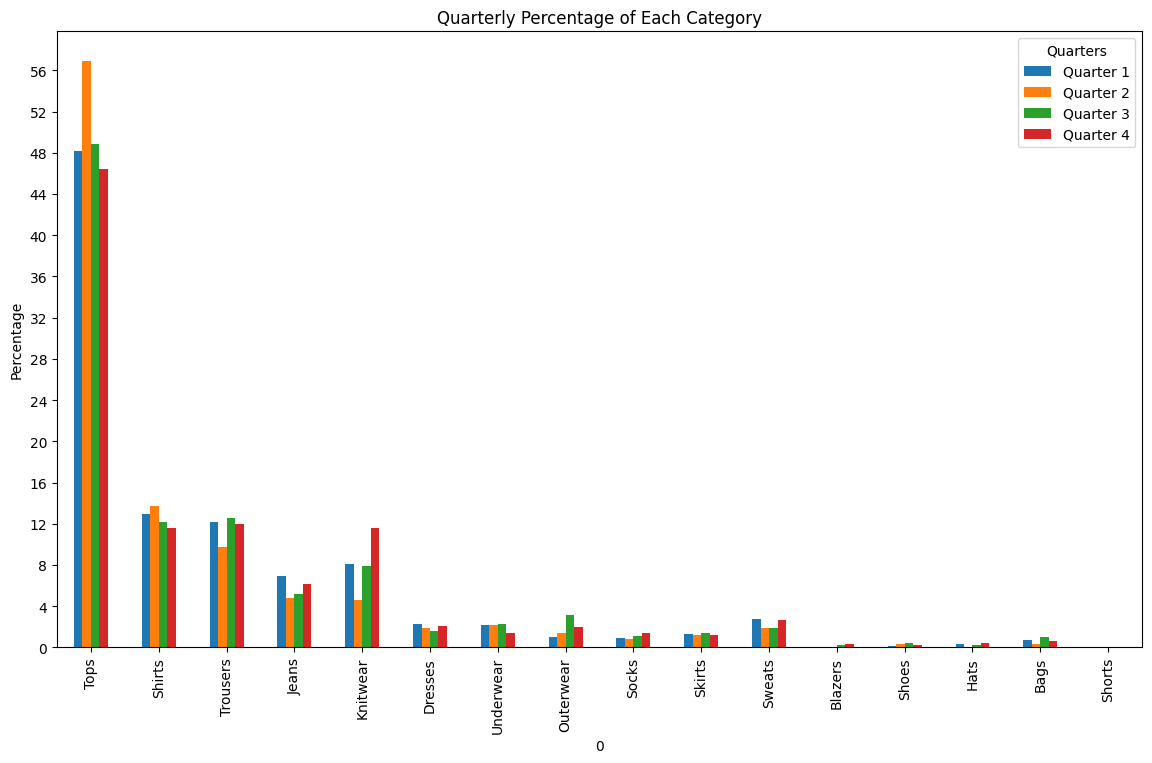

In [ ]:
category_quarterly_procents_df.plot(kind='bar', figsize=(14, 8))
plt.ylabel('Percentage')
plt.title('Quarterly Percentage of Each Category')
plt.legend(title='Quarters')
plt.yticks(np.arange(0, 60, 4))
plt.show()

</details>